## Stacked Stateful LSTM to Predict Sum of Sine and Cosine Functions

This notebook demonstrates how to implement LSTM model in Keras when there are multiple inputs. Here, LSTM model the sum of sine and cosine functions and compare with predictions and original values.

#### Generating 'sine' values

In [286]:
import numpy as np

step_size = (20*np.pi/1000)
points = np.arange(1000) #returns evenly space points b/w 0 and 1000
points = step_size*points  #now distance b/w two points is 20*np.pi/1000
sin_dataset = np.sin(points)[:,None] #creates sine values at generated points
cos_dataset = np.cos(points)[:,None] #creates cosine values at generated points
sum_dataset = np.sin(points)[:,None] + np.sin(points)[:,None]#creates tan values at generated points

print sin_dataset.shape

(1000, 1)


#### Plotting the generated sine values

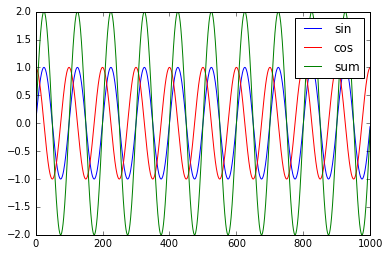

In [287]:
import matplotlib.pyplot as plt
import pylab
pylab.plot(sin_dataset, 'blue', label='sin')
pylab.plot(cos_dataset, 'red', label ='cos')
pylab.plot(sum_dataset, 'green', label ='sum')
pylab.legend()
pylab.show()

#### Combine sin and cos datasets into a single dataset

In [289]:
dataset = []
for i in range(1000):
    dataset.append([sin_dataset[i, 0], cos_dataset[i, 0]])
dataset = np.array(dataset)    
print dataset.shape
print dataset[0:2]

(1000, 2)
[[0.         1.        ]
 [0.06279052 0.99802673]]


#### Splitting the dataset into train and test datasets

In [290]:
train_size = int(len(dataset)*0.67)
test_size   = len(dataset) - train_size

train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

print train.shape
print test.shape

(670, 2)
(330, 2)


#### Function - Generate X and Y for the LSTM

In [291]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
            dataX.append(dataset[i:(i+look_back)])
            dataY.append(dataset[i+look_back,0]+dataset[i+look_back, 1])
    return np.array(dataX), np.array(dataY)

#### Window of 10 time steps

In [292]:
look_back = 10

trainX, trainY = create_dataset(train, look_back)
testX, testY   = create_dataset(test, look_back)

print 'trainX shape =', trainX.shape
print 'trainY shape =', trainY.shape
print 'testX shape  =', testX.shape
print 'testY shape  =', testY.shape

print trainX[0], '=>', trainY[0]
print trainX[1], '=>', trainY[1]
print trainX[2], '=>', trainY[3]

trainX shape = (660, 10, 2)
trainY shape = (660,)
testX shape  = (320, 10, 2)
testY shape  = (320,)
[[0.         1.        ]
 [0.06279052 0.99802673]
 [0.12533323 0.9921147 ]
 [0.18738131 0.98228725]
 [0.24868989 0.96858316]
 [0.30901699 0.95105652]
 [0.36812455 0.92977649]
 [0.42577929 0.90482705]
 [0.48175367 0.87630668]
 [0.53582679 0.84432793]] => 1.3968022466674206
[[0.06279052 0.99802673]
 [0.12533323 0.9921147 ]
 [0.18738131 0.98228725]
 [0.24868989 0.96858316]
 [0.30901699 0.95105652]
 [0.36812455 0.92977649]
 [0.42577929 0.90482705]
 [0.48175367 0.87630668]
 [0.53582679 0.84432793]
 [0.58778525 0.80901699]] => 1.4079372325244788
[[0.12533323 0.9921147 ]
 [0.18738131 0.98228725]
 [0.24868989 0.96858316]
 [0.30901699 0.95105652]
 [0.36812455 0.92977649]
 [0.42577929 0.90482705]
 [0.48175367 0.87630668]
 [0.53582679 0.84432793]
 [0.58778525 0.80901699]
 [0.63742399 0.77051324]] => 1.4135157333501


#### Building the LSTM model

In [293]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

batch_size = 1
model = Sequential()
model.add(LSTM(32, batch_input_shape=(batch_size, look_back, 2), stateful=True, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(32, batch_input_shape=(batch_size, look_back, 2), stateful=True, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(32, batch_input_shape=(batch_size, look_back, 2), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
for i in range(100):
    print "Epoch No = ", i
    model.fit(trainX, trainY, epochs=1, batch_size=1, verbose=1, shuffle=False)
    model.reset_states()

Epoch No =  0
Epoch 1/1
660/660 [==============================] - 58s 89ms/step - loss: 0.1796 - acc: 0.0288
Epoch No =  1
Epoch 1/1
660/660 [==============================] - 63s 96ms/step - loss: 0.0851 - acc: 0.0348
Epoch No =  2
Epoch 1/1
660/660 [==============================] - 36s 54ms/step - loss: 0.0592 - acc: 0.0364
Epoch No =  3
Epoch 1/1
660/660 [==============================] - 32s 49ms/step - loss: 0.0939 - acc: 0.0333
Epoch No =  4
Epoch 1/1
660/660 [==============================] - 35s 53ms/step - loss: 0.0443 - acc: 0.0364
Epoch No =  5
Epoch 1/1
660/660 [==============================] - 39s 58ms/step - loss: 0.0445 - acc: 0.0364
Epoch No =  6
Epoch 1/1
660/660 [==============================] - 33s 50ms/step - loss: 0.0322 - acc: 0.0394
Epoch No =  7
Epoch 1/1
660/660 [==============================] - 31s 46ms/step - loss: 0.0537 - acc: 0.0364
Epoch No =  8
Epoch 1/1
660/660 [==============================] - 32s 49ms/step - loss: 0.0428 - acc: 0.0394
Epoch No =

660/660 [==============================] - 28s 43ms/step - loss: 0.0229 - acc: 0.0394
Epoch No =  74
Epoch 1/1
660/660 [==============================] - 26s 40ms/step - loss: 0.0210 - acc: 0.0394
Epoch No =  75
Epoch 1/1
660/660 [==============================] - 27s 40ms/step - loss: 0.0206 - acc: 0.0394
Epoch No =  76
Epoch 1/1
660/660 [==============================] - 27s 41ms/step - loss: 0.0212 - acc: 0.0394
Epoch No =  77
Epoch 1/1
660/660 [==============================] - 26s 39ms/step - loss: 0.0276 - acc: 0.0394
Epoch No =  78
Epoch 1/1
660/660 [==============================] - 26s 40ms/step - loss: 0.0232 - acc: 0.0394
Epoch No =  79
Epoch 1/1
660/660 [==============================] - 27s 42ms/step - loss: 0.0190 - acc: 0.0394
Epoch No =  80
Epoch 1/1
660/660 [==============================] - 27s 40ms/step - loss: 0.0228 - acc: 0.0394
Epoch No =  81
Epoch 1/1
660/660 [==============================] - 28s 42ms/step - loss: 0.0175 - acc: 0.0394
Epoch No =  82
Epoch 1/1
6

In [294]:
trainScore = model.evaluate(trainX, trainY, batch_size=1, verbose=1)
print('Train Score: ', trainScore)
testScore = model.evaluate(testX, testY, batch_size=1, verbose=1)
print('Test Score: ', testScore)

660/660 [==============================] - 3s 4ms/step
('Train Score: ', [0.003172958712531135, 0.03939393939393939])
320/320 [==============================] - 1s 4ms/step
('Test Score: ', [0.003576774530952187, 0.0375])


#### Predicting Future Values of the Sum Function

In [295]:
look_ahead = testX.shape[0]

predictions = np.zeros((look_ahead,1))

for i in range(look_ahead):
    prediction = model.predict(np.array([testX[i]]), batch_size=1)
    predictions[i] = prediction

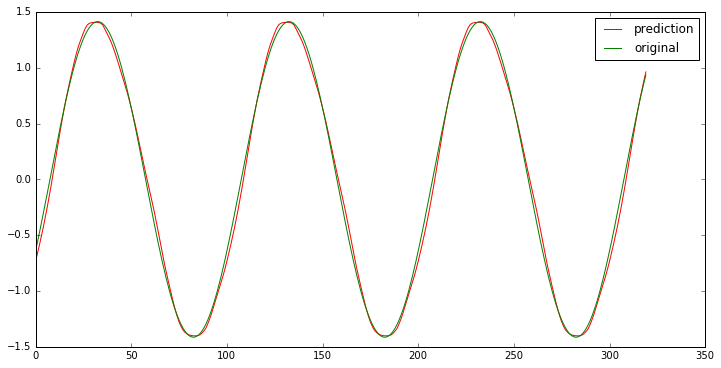

In [313]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),testY,'g',label="original")
plt.legend()
plt.show()